In [1]:
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from lpproj import LocalityPreservingProjection

#########################
#设置默认参数
FIGURESIZE=(10,8)
FONTSIZE=24

plt. rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size']=FONTSIZE

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18


In [2]:
#创建瑞士卷数据集

# 创建时间范围为 0 到 10，步长为 0.01 的数组
t1=np.arange(0,10,.01)

# 生成瑞士卷数据集的三个坐标维度
x0=np.cos(t1)*(t1+1)
x1=np.sin(t1)*(t1+1)
x2=[20*random.random() for x in x0]

# 将三个维度的数据合并成一个瑞士卷数据集
x0=np.array([x0])
x1=np.array([x1])
x2=np.array([x2])
swiss=np.concatenate([x0,x1,x2],axis=0).T
swiss.shape # 打印瑞士卷数据集的形状信息

(1000, 3)

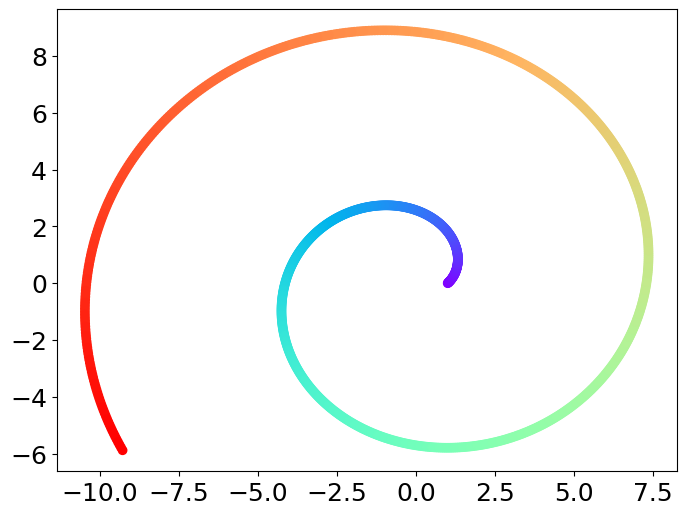

In [3]:
# 绘制瑞士卷数据集的二维散点图
FIGURESIZE = (8, 6)  # 定义图形大小
fig = plt.figure(figsize=FIGURESIZE)  # 创建一个图形实例
ax = fig.add_subplot(111)  # 添加一个子图
ax.scatter(swiss[:, 0], swiss[:, 1], c=t1, cmap=plt.cm.rainbow)  # 绘制散点图

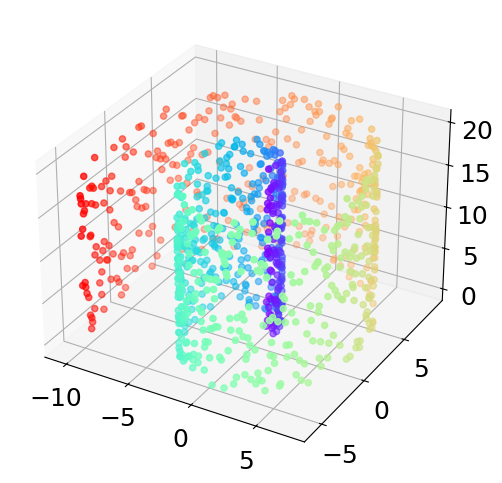

In [4]:
#绘制瑞士卷数据集三维图像
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(swiss[:, 0], swiss[:, 1],swiss[:,2], c=t1, cmap=plt.cm.rainbow)

In [5]:
#创建弓箭数据集
t2= np.arange(-1,1,.001)
x0=t2
x1=[0.02*random.uniform(-1,1) if (v<.5 and v>-.5)
    else 2*(1+v)*random.uniform(-1,1) if v<=-.5
    else 2*(-.5+v)*random.uniform(-1,1) for v in t2]
x2=np.cos(t2*5+1.5)
x0=np.array([x0])
x1=np.array([x1])
x2=np.array([x2])
arrow=np.concatenate([x0,x1,x2], axis=0).T
arrow.shape

(2000, 3)

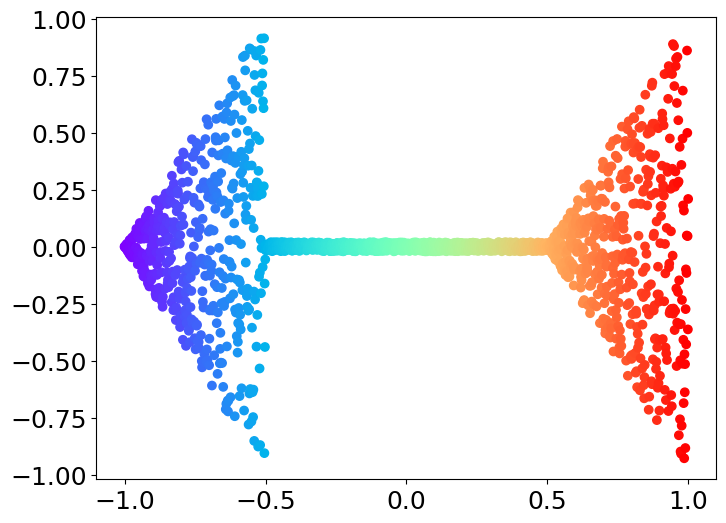

In [6]:
#绘制弓箭数据集二维图像
fig=plt.figure(figsize=FIGURESIZE)
ax=fig.add_subplot(111)
ax.scatter(arrow[:,0],arrow[:,1],c=t2,cmap=plt.cm.rainbow)

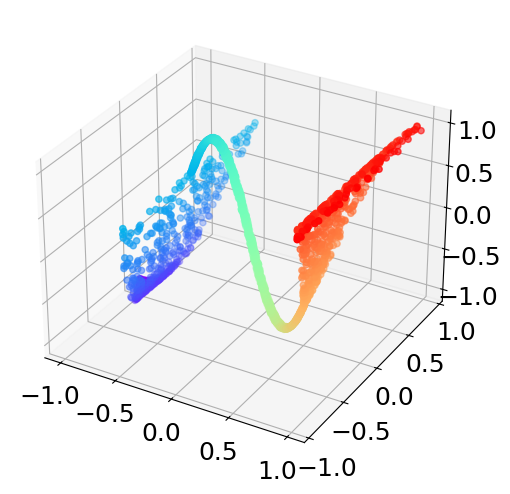

In [7]:
#绘制弓箭数据集三维图像
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(arrow[:, 0], arrow[:, 1],arrow[:,2], c=t2, cmap=plt.cm.rainbow)

In [8]:
#创建 LPP 模型
lpp = LocalityPreservingProjection(n_neighbors=5,n_components=2)

# 使用 LPP 模型拟合瑞士卷数据集
lpp.fit(swiss)

LocalityPreservingProjection()

In [9]:
# 将瑞士卷数据集进行降维处理
y = lpp.transform(swiss)
y.shape

(1000, 2)

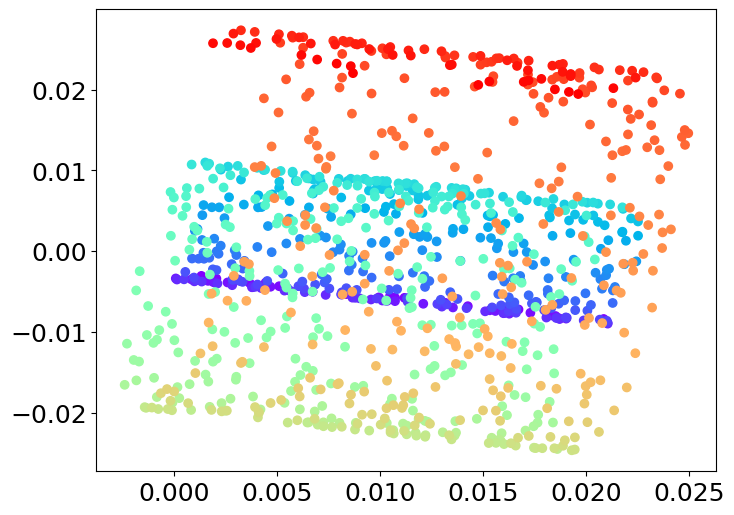

In [10]:
# 创建一个图形实例
fig = plt.figure(figsize=FIGURESIZE)

# 添加一个子图
ax = fig.add_subplot(111)

# 绘制降维后的数据的散点图，根据 t1 数组的数值设置颜色
ax.scatter(y[:, 0], y[:, 1], c=t1, cmap=plt.cm.rainbow)

In [11]:
#创建 LPP 模型
lpp = LocalityPreservingProjection(n_components=2)

# 使用 LLE 模型拟合弓箭数据集
lpp.fit(arrow)

LocalityPreservingProjection()

In [12]:
#将弓箭数据集进行降维处理
y1=lpp.transform(arrow)
y1.shape

(2000, 2)

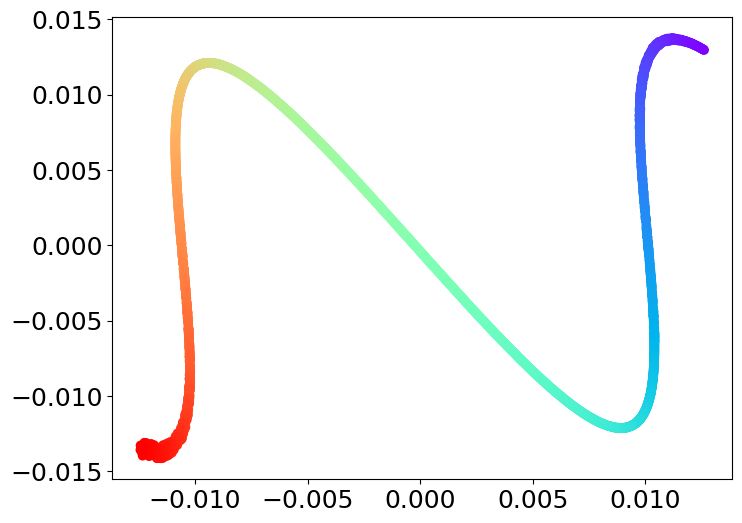

In [13]:
# 创建一个图形实例
fig = plt.figure(figsize=FIGURESIZE)

# 添加一个子图
ax = fig.add_subplot(111)

# 绘制降维后的数据的散点图，根据 t2 数组的数值设置颜色
ax.scatter(y1[:, 0], y1[:, 1], c=t2, cmap=plt.cm.rainbow)